# Project: Part 1

# Aufgabe 1)

Importieren von Packages

In [1]:
import pandas as pd

Laden der Dataframes, Augabe 1.1

In [2]:
athletes = pd.read_csv("data/athletes.csv")
# keine Probleme
games = pd.read_csv("data/games.csv",sep=";")
# Trennzeichen wurden nicht erkannt. Lösung: sep=";"
results_2002 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=0)
results_2004 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=1)
results_2006 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=2)
results_2008 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=3)
results_2010 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=4)
results_2012 = pd.read_excel("data/results.xlsx", header = 1, sheet_name=5)
# Fehler: Missing optional dependency "openpyxl". Lösung: conda to install openpyxl.
# Die zweite Spalte enthält die Column-names. Lösung: header=1.--> Zeile 2 = Spaltennamen
# Die Excel enthält mehrere sheets.Lösung: Jeden Sheet für sich laden. 
# Mit sheet_name=None kann man alle Laden, jedoch als Dictonary. So wie es jetzt ist, erhält man direkt einen Dataframe für jeden Sheet.

Verstehen der Dataframes, Aufgabe 1.1 

In [3]:
athletes.head()

,athlete_id,name,gender,measurements,born,died,affiliations
0,7.0,Patrick•Chila,male,180 cm / 73 kg,1969-11-27,NaN,Espérance de Reuilly / Levallois SCTT / Royal ...
1,15.0,Damien•Éloi,male,165 cm / 58 kg,1969-07-04,NaN,"Caen TTC, Caen (FRA) / SAG Cestas, Cestas (FRA..."
2,18.0,Jean-Philippe•Gatien,male,178 cm / 73 kg,1968-10-16,NaN,"Levallois SC, Levallois-Perret (FRA)"
3,27.0,Christophe•Legoût,male,177 cm / 75 kg,1973-08-06,NaN,"Levallois SC, Levallois-Perret (FRA) / Istres ..."
4,35.0,Fabrice•Santoro,male,177 cm / 68 kg,1972-12-09,NaN,NaN


In [4]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39375 entries, 0 to 39374
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   athlete_id    39375 non-null  float64
 1   name          39375 non-null  object 
 2   gender        39375 non-null  object 
 3   measurements  38997 non-null  object 
 4   born          39373 non-null  object 
 5   died          302 non-null    object 
 6   affiliations  30196 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.1+ MB


In [5]:
games.head() # gemerkt, dass Trennzeichen nicht vernünftig erkannt wurden

,year,season,city,country,opened,closed
0,1912,summer,Stockholm,Sweden,1912-07-06,1912-07-27
1,1920,summer,Antwerpen,Belgium,1920-08-14,1920-08-30
2,1996,summer,Atlanta,United States,1996-07-19,1996-08-04
3,1924,summer,Paris,France,1924-07-05,1924-07-27
4,1992,summer,Barcelona,Spain,1992-07-25,1992-08-09


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     62 non-null     int64 
 1   season   62 non-null     object
 2   city     62 non-null     object
 3   country  62 non-null     object
 4   opened   51 non-null     object
 5   closed   49 non-null     object
dtypes: int64(1), object(5)
memory usage: 3.0+ KB


In [7]:
results_2002.head() # Columns waren in der ersten Zeile nicht benannt. Dafür aber in der Zweiten

,athlete_id,season,sport,event,position,medal,country,country_code,team
0,13065,winter,Bobsleigh,"Two, Women",7.0,NaN,Italy,ITA,Gerda Weissensteiner
1,13139,winter,Speed Skating,"3,000 metres, Women",10.0,NaN,Canada,CAN,NaN
2,13139,winter,Speed Skating,"5,000 metres, Women",3.0,Bronze,Canada,CAN,NaN
3,68826,winter,Bobsleigh,"Two, Men",10.0,NaN,Great Britain,GBR,Lee Johnston
4,69119,winter,Bobsleigh,"Four, Men",14.0,NaN,Great Britain,GBR,Great Britain 2


In [8]:
# Den Results-Datensätzen fehlt eine Variable Year! --> hinzufügen.

In [9]:
results_2002["year"] = 2002
results_2004["year"] = 2004
results_2006["year"] = 2006
results_2008["year"] = 2008
results_2010["year"] = 2010
results_2012["year"] = 2012

In [10]:
results = pd.concat([results_2002, results_2004, results_2006, results_2008, results_2010, results_2012])
# Datensätze in einen DF zusammführen. Mit concat, da die Datensätze die gleichen Spalten haben.

Alle Dataframes zusammenfügen, Aufgab 1.2

In [11]:
# Ich habe mich entschieden die DFs zuerst zusammenzufügen, da ich erst dann Variablen wie "Age" bilden kann.
# Logischerweise ließen sich die DataFrames am besten über "athlete_id" mergen.
# results ist der größte Dataframe. --> In diesem müssten also mehr Athlete_IDs vorhanden sein als im athletes_df.
# Jedoch waren auch nicht alle Athlets_IDs im Dataframe Results enthalten. 
#--> mutmaßlich, weil diese nicht zwischen 2002 und 2012 teilgenommen haben (Sicher war ich mir aber nicht). 
# --> Ich habe mich trotzdem entschieden einen inner join zu machen, 
# da Zeilen mit Werten aus nur einem der beiden Datensätzen mangelhaft wären. 
df1 = pd.merge(results, athletes, on="athlete_id", how="inner")

In [12]:
# Merge on year. So weiß man in welchem Jahr die Athleten wo teilgenommen haben.
# Da der results df, eh nur Daten von 2002 bis 2012 enthält, brauche ich auch nur diese Jahre aus dem Datensatz games.
# inner würde die  Schnittmenge behalten. Genau die möchte ich. 
# Allerdings fehlt in dem DF games das Jahr 2010. 
# Daher ist ein left merge angebracht, da so auch die zeilen mit dem Jahr 2010 enthalten bleiben.
df = pd.merge(df1, games, on="year", how="left")

In [13]:
df.to_csv("data/data.csv", index=False) # Zur Analyse ob alles geklappt hat. + Identifizierung von doppelten Columns.

Doppelte columns umbennen oder löschen

In [14]:
df.drop(["season_y"], axis=1, inplace=True) 
# Es wurden für gleiche Variablennamen Suffixe erstellt. season_y und season_x hatten die gleichen Werte. 

In [15]:
df = df.rename(columns={"country_x": "country_of_origin","country_y": "host-country","season_x":"season"})
# Suffixe bei country. country_y = Herkunftsland, country_y = Gastgeberland der Spiele.

Bearbeitung der Spalten

Name

In [16]:
df[["first_name", "last_name"]] = df["name"].str.split("•", expand=True)
# Für eine der  Aufgaben brauchen wir die Nachnamen. -> Variable name anhand dieses Punktes trennen. via split

Measurement

In [17]:
df[["height_m", "weight_kg"]] = df["measurements"].str.split(" / ", expand=True)
# die Variable measurements enthält gewicht und göße und wird durch / getrennt

In [18]:
# Problem: Die Spalte height_m enthält noch kg Werte, weil manchmal nur kg angegeben war.

# contains prüft ob in height_m kg vorkommt und erzeugt eine Boolean-Maske in kg_rows.
# na = False --> bei fehelenden wertensoll False angenommen werden.
kg_rows = df["height_m"].str.contains("kg", na=False)

# Extrahieren der Zahlen aus der height-Spalte und speichern in der weight-Spalte.
# loc für präzisen Zugriff. Überall dort wo eine 1 steht wird der Eintrag ausgewählt und in weight eingefügt. 
df.loc[kg_rows, "weight_kg"] = df.loc[kg_rows, "height_m"].str.replace(" kg", "", regex=False)

# entfernt die alle kg werte in der height spalte.
df.loc[kg_rows, "height_m"] = None

In [19]:
# Problem: height soll in Meter angegeben werden. / 100 geht nicht weil string
# Lösung. den zusatz cm entfernen. 
df["height_m"] = df["height_m"].str.replace(" cm", "", regex=False)

In [20]:
# Umwandlung von string in float + cm zu m (/100)
df["height_m"] = df["height_m"].astype(float)/100 # in float umwandeln durch astype(float) und /100 für Meter

In [21]:
#Problem beim umwandeln von wheight in float:In weight_kg sind werte für Gewichtsbereiche angegeben z.B. 94-103 und Werte mit , abgetrennt.
#--> Man kann damit nicht rechnen. 

# Zusatz kg entfernen
df["weight_kg"] = df["weight_kg"].str.replace(" kg", "", regex=False)

# splitten anhand von - und , in weight low und high
df[["weight_low", "weight_high"]] = df["weight_kg"].str.split(r"[-,]", expand=True)

#3 Liste mit columns erstellen. Diese columns werden dann in numeric überführt.
cols = ["weight_low", "weight_high"]
df[cols] = df[cols].apply(pd.to_numeric)

In [22]:
# Jetzt muss ich noch den Durchschnittswert berechen, wenn es in low und in high einen Wert gibt. Dieser muss dann in weight gespeichert werden.
df["weight_kg"] = df.apply(
    lambda row: (row["weight_low"] + row["weight_high"]) / 2 
    if pd.notnull(row["weight_low"]) 
    and pd.notnull(row["weight_high"]) 
    else row["weight_kg"],
    axis=1
)

In [23]:
df["weight_kg"] = df["weight_kg"].astype(float) 
# weight_kg in float umwandeln

team

In [24]:
# Es soll später nur eine Medaille gezählt werden, wenn eine Team diese gewonnen hat und nicht eine für jeden Athleten.
# Daher überführung in 0 und 1. Jetzt kann man gucken ist der Athlete in einem Team oder nicht.
df["team"] = df["team"].notna() & (df["team"].str.strip() != "")
df["team"] = df["team"].astype(int)

gender 

In [25]:
# Ich möchte die Variable gender in einen Bolean überführen, da diese nur zwei Werte enthält. 1 = Female 0 = Male
df["gender"] = df["gender"] == "female"

Position

In [26]:
# ich möchte Position in ein float überführen. Ein float ist handlicher als ein string
# Problem: could not convert string to float: 'Fourty-Two'
# --> Lösung: Wert per hand ändern mit replace()
df["position"] = df["position"].replace("Fourty-Two", 42)

In [27]:
df["position"] = df["position"].astype(float)

event

In [28]:
df[["event", "event_gender"]] = df["event"].str.rsplit(",", n=1, expand=True)
# n=1 sorgt dafür, dass nur das letzte Komma berücksichtigt wird (falls mehr als eins vorhanden ist)
# expand=True gibt zwei neue Spalten zurück → direkt zugewiesen an ["event", "event_gender"], 
# dabei wird immer das was nach dem letzten Komma steht abgeschnitten. 

# Ein normaler Split wäre nicht sinnvoll. 
# Das einzige was sinnvoll abgesplitted werden konnte ist Mixed, Men, Woman, Open

In [29]:
df["event"] = df["event"].str.replace(",", "", regex=False)
# entfernt alle , in event. --> Auf der offiziellen Website ist es auch so, dass alles ohne , als Eventname zu finden ist.

Spalten Age und bmi hinzufügen

In [30]:
# bmi 
df["bmi"] = df["weight_kg"] / (df["height_m"]**2 ) # berechnet den Bmi und speichert ihn in einer neuen Variable

In [31]:
# age
df[["born", "opened"]] = df[["born", "opened"]].apply(pd.to_datetime)
# Umwandlung in ein Datetime-objekt

def calculate_age(born, opened): 
    age = opened.year - born.year # rechnet eröffnungsjahr - born
    
    # Wenn Geburtstag im aktuellen Jahr noch nicht war, ein Jahr abziehen
    if (opened.month, opened.day) < (born.month, born.day):
        age -= 1
    return age

In [32]:
df["age"] = df.apply(lambda row: calculate_age(row ["born"],row ["opened"]), axis=1)
# apply wendet die Funktion calculate_age zeilenweise an. lambda sorgt dafür, dass es für jede Zeile passiert.
# in dem Aufruf von calculate wirde gesagt: für jede Reihe der Spalte ["..."]

löschen von überflüssigen Spalten!

In [33]:
# Spalten löschen die ich in keiner Aufgabe brauche oder brauchen könnte
df.drop(["name","measurements","weight_low","weight_high","born","died","affiliations","city", "host-country","opened","closed",], axis=1, inplace=True) 

Sortieren der Spalten nach year, sport, event, position

In [34]:
df_sorted = df.sort_values(by=["year", "sport", "event", "position"])

Ich möchte, dass die Spalte gender_event hinter event steht.

In [35]:
# Spalte isolieren
col = df_sorted.pop("event_gender")

# An Position 3 (also vierte Spalte) einfügen
df_sorted.insert(4, "event_gender", col)

# Antwort Aufgabe 1.4 - Erstellung eines Datensatzes für die weiteren Aufgaben.

In [36]:
df_sorted.head(3)


,athlete_id,season,sport,event,event_gender,position,medal,country_of_origin,country_code,team,year,gender,first_name,last_name,height_m,weight_kg,bmi,age
814,99335,winter,Alpine Skiing,Combined,Men,1.0,Gold,Norway,NOR,0,2002,False,Kjetil André,Aamodt,1.76,85.0,27.440599,30.0
912,99432,winter,Alpine Skiing,Combined,Women,1.0,Gold,Croatia,CRO,0,2002,True,Janica,Kostelić,1.75,76.0,24.816327,20.0
87,81225,winter,Alpine Skiing,Combined,Women,2.0,Silver,Austria,AUT,0,2002,True,Renate,Götschl,1.65,68.0,24.977043,26.0


In [37]:
df_sorted.to_csv("data/data_sorted.csv", index=False)

# Antwort Aufgabe 1.3 
* Wie haben Sie die Daten kombiniert haben?

Ich habe mich entschieden zuerst die DFs results und atheles zu mergen. Dies war ein logischer Schritt, weil beide Datensätze die Spalte "athlede_id" enthielten. Da der DF Results ohne die Daten des DF Athletes wenig sinnvol ist,  habe ich mich für einen "inner"- merge entschieden. So blieb nur noch die Scnittmenge erhalten. Und alle IDs hatten Daten aus beiden DFs. 

Als nächstes habe ich dann den DF games und die beiden schon zusammengeführten DFs gemerged. Hier habe ich mich für einen "left"-merge auf die Variable "year" entschieden, da so die Athleten aus dem Jahr 2010 erhalten blieben. Das Jahr 2010 fehlte in dem DF games. 

* Was waren die größten Herausforderungen?
Die größte Herausforderung lag in der Spalte measurements. Hier waren viele miese Fallen eingebaut. Zum einen hat der Split nicht so geklappt wie man sich das vorstellt und zum anderen mussten kg Werte aus der Height_spalte entfernt werden. Zudem gab es auch noch Gewichtsangaben mit von - bis.

Eine weitere Herausforderung war für mich die Spalte "Event". Ich habe lange überlegt, ob ich diese überhaupt splitten kann und ob eine weitere Aufgliederung überhaupt etwas bringt. 
  
* Wie sind Sie mit diesen Herausforderungen umgegangen – und warum genau so?

in der Spalte measurments, konnte man die Daten splitten, mit einem Blick in den DF, oder beim umwandeln in einen Float, stellte man dann aber schnell fest, dass das nicht geklappt hat. Ich bin jeder Fehlermeldung Schritt für Schritt nachgegangen und habe Foren abgesucht wie man spezifische Werte herausfiltert und in andere Spalten überträgt, wie man die Spannenangaben (z.B. 94 -104)isoliert und einen mittelwert bildet. Mein genaues vorgehen können sie aus den Kommentierungen entnehmen. 

Bei der Spalte "event" ist mir irgendwann eingefallen, dass ich auch einfach auf der Website gucken kann, wie die Daten dort aufgelistet sind. 



# Aufgabe 2)

Antwort Aufgabe 2.1) Welcher Nachname ist unter den Athlet*innen der Olympischen Spiele 2012 am häufigsten, und wie oft kommt dieser Name vor?
* Es ist Smith und er kommt 93 mal vor. 
 

In [38]:
print(df["last_name"].value_counts()[0:1])
# value_counts zählt die Häufigkeit und erstellt typischerweise eine sortierte Liste.[0:5] würde die ersten 5 ausgeben.
# Der häufigste name ist Smith.

last_name
Smith    93
Name: count, dtype: int64


Antwort Aufgabe 2.2) Welche Frau gewann Gold im 100m race der olympischen Spiele 2012?

* Shelly-Ann Frraser-Pryce für Jamaica

In [39]:
winner_100m_women_2012 = df[(df["position"] == 1) & 
                            (df["year"] == 2012) &
                            (df["sport"] == "Athletics") &
                            (df["event"] == "100 metres") &
                            (df["gender"] == 1)]
# für jede Spalte werden die Voraussetzungen geprüft. # Wichtig ist aber, dass alles richtig geschrieben ist. 
print(winner_100m_women_2012[["first_name", "last_name","country_of_origin"]])

       first_name     last_name country_of_origin
42900  Shelly-Ann  Fraser-Pryce           Jamaica


Antwort Aufgabe 2.3) Welcher Athlet hat die meisten Goldmedaillen gewonnen (über alle Jahre im Datensatz hinweg), wenn man nur Athleten aus den folgenden Ländern berücksichtigt: „Jamaika“, „Trinidad und Tobago“, „Barbados“, „Grenada“, „Saint Kitts und Nevis“?

* Es war Usain Bolt 

In [40]:
countries = ["Jamaica", "Trinidad and Tobago", "Barbados", "Grenada", "Saint Kitts", "Nevis"]
# Liste mit den Ländernamen 
gold_medal = df[(df["position"] == 1) & (df["country_of_origin"].isin(countries))]
# Voraussetzungen prüfen.
gold_count = (gold_medal.groupby(["athlete_id", "first_name", "last_name", "country_of_origin"]).size().sort_values(ascending=False))
# Problem: Es wurden mehrere Athleten rausgefiltert. Lösung: Athleten noch nach anzahl ihrer zeilen sortieren.
gold_count.head(1)

athlete_id  first_name  last_name  country_of_origin
105512      Usain       Bolt       Jamaica              5
dtype: int64

Antwort Aufgabe 2.4 )Was war die beste, schlechteste und die Medianplatzierung, die von Athlet*innen aus „Mongolei“ erreicht wurde?
*Beste: 1.0, Schlechteste: 98.0, Median: 13.0

In [41]:
mongolia_positions = df[(df["country_of_origin"] == "Mongolia")] 
# Erstellen eines DFs nur mit Mongolia-Athleten --> filtern nach Mongolia

best = mongolia_positions["position"].min()
worst = mongolia_positions["position"].max()
median = mongolia_positions["position"].median()

print(f"Best: {best}, Worst: {worst}, Median: {median}")

Best: 1.0, Worst: 98.0, Median: 13.0


# Aufgabe 3)

Antwort Aufgabe 3.1) Welche 5 Sportarten haben das höchste Durchschnittsalter unter den Goldmedaillengewinner*innen? Gib die Sportart und das Durchschnittsalter an.

In [42]:
gold = df[df["position"] == 1]
# Df nur mit Zeilen, die position == 1 haben.
gold_age = gold.groupby("sport")["age"].mean().sort_values(ascending=False)
# mit groupby auf sport werden die Sportarten nachen Gruppen aufgeteilt.
# Bezüglich der Variable "age" wird dann das durchschnittsalter berechnet.
# Dann absteigend sortiert. 
gold_age.head(5)

sport
Equestrian Dressage    39.181818
Equestrian Jumping     38.200000
Equestrian Eventing    37.888889
Curling                32.684211
Skeleton               31.500000
Name: age, dtype: float64

Antwort Aufgabe 3.2) Zeige die 5 Sportarten mit dem niedrigsten durchschnittlichen BMI männlicher Athleten.

In [43]:
df[df["gender"] == 0].groupby("sport")["bmi"].mean().sort_values().head(5)
# Voraussetzung Male,gruppieren nach sportart, berechnen des Mean in in der Spalte bmi, sortieren, ausgabe der top5

sport
Ski Jumping              19.562116
Nordic Combined          20.934939
Triathlon                21.131652
Cycling Mountain Bike    21.479870
Boxing                   21.557636
Name: bmi, dtype: float64

# Aufgabe 4)

Berechne den Medaillenspiegel für die Olympischen Spiele 2012. Verwende den offiziellen Medaillenspiegel als Referenz. Deine Tabelle sollte die gleiche Struktur haben (gleiche Spaltennamen und gleiche Sortierung) wie der offizielle Medaillenspiegel. Zeige die Top 10 Länder an.

In [44]:
# Nur Daten aus 2012 und mit Medaille.
df_2012 = df_sorted[(df_sorted["year"] == 2012) & (df_sorted["medal"].notna())]

In [45]:
# in team_medals sollen Teams erkannt werden, sodass nur einmal eine medal gezählt wird.
# Ich habe team binär codiert. so wird erkannt ob es ein Team ist oder nicht. 
team_medals = df_2012[df_2012["team"] == 1] # In team_medals sind nur noch Team medals.
team_medals_unique = team_medals.drop_duplicates(subset=["sport","event","event_gender","country_of_origin","medal"])
# .drop_duplicates droped alle Duplikate. Also alle Zeilen, die sich in den genannten Spalten doppeln und behält nur eine.

In [46]:
individual_medals = df_2012[df_2012["team"] == 0]
# speichert alle nicht teams in individual_medals

In [47]:
medals_combined = pd.concat([team_medals_unique, individual_medals])

#Gruppieren nach Country und Medaillenart
medal_table = medals_combined.groupby(["country_of_origin", "medal"]).size().unstack(fill_value=0)
#Dreht in diesem Fall "medal" von der Zeilenachse in die Spaltenachse.
# fill_value = füllt bei den Ländern, die nix gewonnen haben die Spalte mit 0 auf. 

In [48]:
# berechnet total und fügt total als neue spalte hinzu. 
medal_table["total"] = ( medal_table["Gold"] + medal_table["Silver"] + medal_table["Bronze"])

In [49]:
medal_table = medal_table[["Gold","Silver", "Bronze","total"]].sort_values(by=["Gold", "Silver", "Bronze"], ascending=False)
# medal_table soll die columns [["Gold","Silver", "Bronze","total"]] beinhalten und diese nach ["Gold", "Silver", "Bronze"] sortieren.

Antwort Aufgabe 4)

In [50]:
medal_table.head(10)

medal,Gold,Silver,Bronze,total
country_of_origin,,,,
United States,46,28,30,104
People's Republic of China,38,31,22,91
Great Britain,29,17,19,65
Russian Federation,20,20,27,67
Republic of Korea,13,9,8,30
Germany,11,20,13,44
France,11,11,13,35
Australia,8,15,12,35
Italy,8,9,11,28


# Aufgabe 5)

Identifiziere ein interessantes Muster, einen Trend oder eine Beziehung in den Daten. Dies kann sich auf Länder, Sportarten, Geschlecht, Zeiträume, Medaillenzahlen oder andere Aspekte beziehen. Erstelle eine einzelne Visualisierung, die die gefundene Erkenntnis klar und verständlich darstellt. Du kannst den Diagrammtyp frei wählen – achte aber darauf, dass er zur Aussage passt, die du vermitteln möchtest.

* Ich möchte Aufzeigen ob die Körpergröße in manchen Sportarten ausschlaggebend für den Sieg ist.
Dabei geht es nicht um Basketball oder andere Sportarten in denen alle Athleten groß sind. Es geht darum Sportarten zu entdecken, in denen die Sieger der letzten jahre größer oder kleiner sind als der Durchschnitt. Dies würde darauf hindeuten, dass es auch in diesen Sportarten einen Vor. bzw. Nachteil geben könnte.

Im Basketball könnte man so feststellen, dass es nicht nur darum geht das größte Team zu haben. 

In [51]:
mean_sports = df_sorted[df_sorted["gender"] == 0].groupby("sport")["height_m"].describe().sort_values(by="mean")
mean_sports
# Für alle männlichen Athleten (gender == 0) wird die Körpergröße pro Sportart gruppiert,
# dann werden statistische Kennzahlen berechnet (z. B. Mittelwert, Standardabweichung, Min, Max),
# und schließlich wird nach dem durchschnittlichen Wert (mean) aufsteigend sortiert.

,count,mean,std,min,25%,50%,75%,max
sport,,,,,,,,
Artistic Gymnastics,1660.0,1.667030,0.049936,1.55,1.6300,1.660,1.7000,1.84
Weightlifting,470.0,1.702957,0.095489,1.40,1.6300,1.700,1.7700,2.05
Trampolining,47.0,1.705106,0.052248,1.62,1.6700,1.700,1.7500,1.80
Diving,280.0,1.712000,0.056792,1.54,1.6800,1.720,1.7500,1.85
Boxing,770.0,1.748208,0.094325,1.50,1.6800,1.750,1.8100,2.05
Wrestling,825.0,1.749370,0.097224,1.50,1.6800,1.750,1.8200,2.03
Short Track Speed Skating,381.0,1.753202,0.055286,1.62,1.7200,1.750,1.8000,1.88
Freestyle Skiing,208.0,1.760962,0.062955,1.62,1.7200,1.750,1.8000,1.97
Figure Skating,221.0,1.770181,0.063704,1.59,1.7300,1.770,1.8200,1.90


In [52]:
gold_sports_mean = df_sorted[(df_sorted["position"] == 1.0) & (df_sorted["gender"] == 0)].groupby("sport")["height_m"].describe().sort_values(by="mean")
gold_sports_mean
# Alle männlichen Goldmedaillengewinner werden herausgefiltert. (position == 1.0 und gender == 0) 
# dann wird die Körpergröße je Sportart analysiert. 
# Der Rest wiederholt sich.

,count,mean,std,min,25%,50%,75%,max
sport,,,,,,,,
Artistic Gymnastics,37.0,1.632432,0.057223,1.56,1.6000,1.620,1.6600,1.80
Diving,18.0,1.677222,0.062290,1.55,1.6350,1.695,1.7150,1.77
Trampolining,3.0,1.700000,0.020000,1.68,1.6900,1.700,1.7100,1.72
Weightlifting,24.0,1.700833,0.111664,1.50,1.6250,1.715,1.7775,1.92
Short Track Speed Skating,24.0,1.749167,0.053072,1.65,1.7300,1.730,1.7650,1.88
Wrestling,43.0,1.756512,0.106388,1.55,1.6800,1.750,1.8200,2.00
Boxing,32.0,1.756875,0.104061,1.50,1.6700,1.740,1.8300,1.98
Judo,21.0,1.760476,0.098918,1.60,1.7000,1.780,1.8000,2.03
Football,50.0,1.764800,0.075464,1.60,1.7100,1.760,1.8150,1.95


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# durchschnittliche Körpergröße aller männlichen Athleten nach Sportart.
mean_sports = df_sorted[df_sorted["gender"] == 0].groupby("sport")["height_m"].mean()

# Durchschnitt der Körpergröße für männliche Goldmedaillengewinner je sportart.
gold_sports_mean = df_sorted[(df_sorted["position"] == 1.0) & (df_sorted["gender"] == 0)].groupby("sport")["height_m"].mean()

# Berechne die Differenz (Goldmedaillengewinner - mean (alle Athleten))
difference = gold_sports_mean - mean_sports

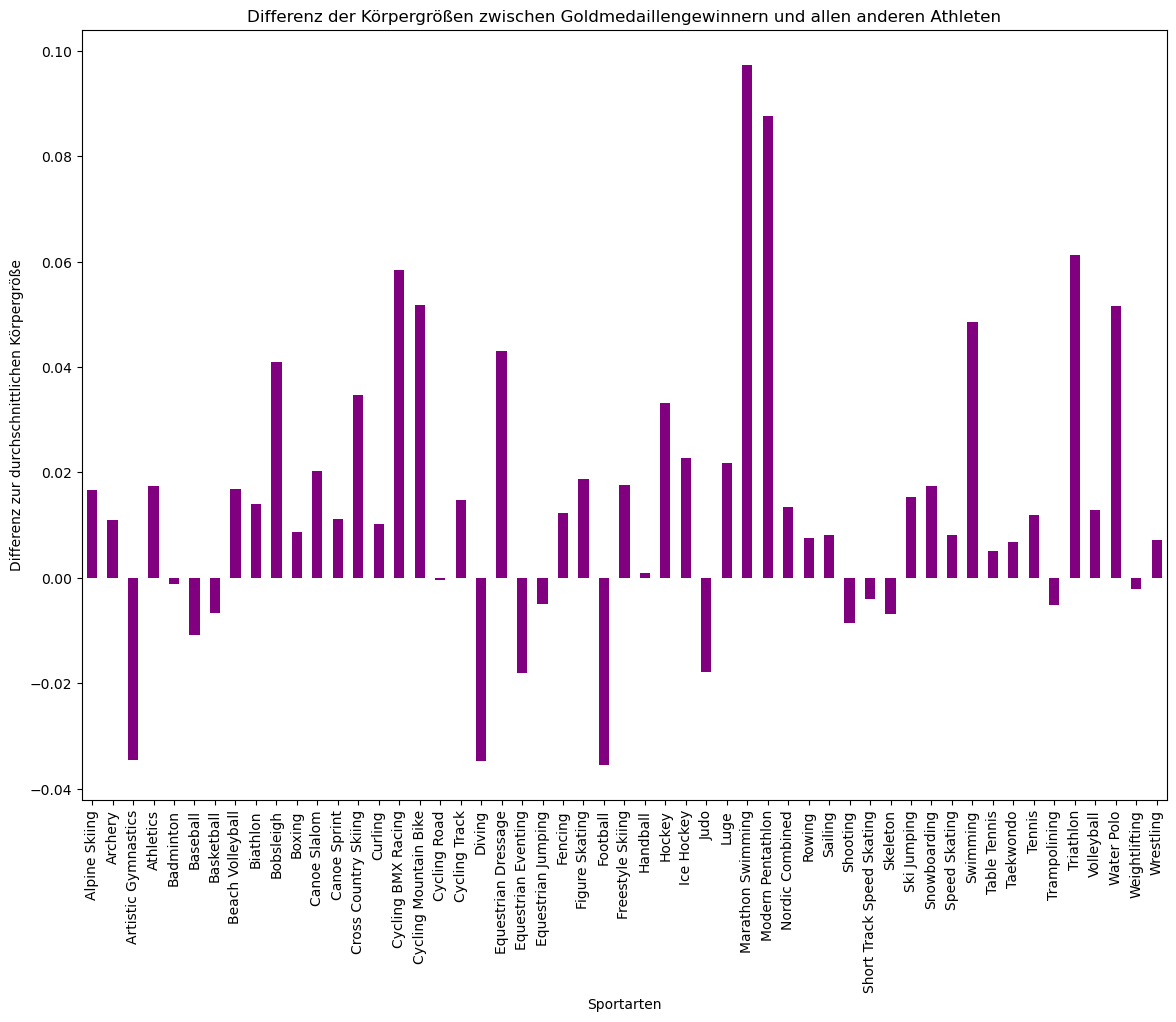

In [54]:
# Visualisierung der Differenz
plt.figure(figsize=(14, 10))
difference.plot(kind="bar", color="purple")

plt.xlabel("Sportarten")
plt.ylabel("Differenz zur durchschnittlichen Körpergröße")
plt.title("Differenz der Körpergrößen zwischen Goldmedaillengewinnern und allen anderen Athleten")
plt.xticks(rotation=90)

plt.show()

Antwort Aufgabe 5.2)

Der Barplot zeigt die Differenz der Durchschnittsgröße der Gewinner über die letzten Jahre zur Durchschnittsgröße aller Athleten einer Disziplin. 

Je größer der Abstand in eine Richtung desto eher spielt die Größe in dieser Sportart eine Rolle. Wenn diese dann auch noch außerhalb der Standardabweichung liegt, dann ist es ziemlich wahrscheinlich, dass Athleten aufgrund ihrer Größe einen Vorteil gegenüber den Anderen haben. Sportarten wie Basketball, in denen alle Athleten groß sind fallen daher nicht ins gewicht. Es werden eher Sportarten beleuchtet, in denen dies weniger offensichtlichtlich ist.

Besonders auffälig ist hier Marathon Swimming und Pentathlon. In beiden Sportarten ist der durchschnittliche Gewinner der letzten Jahre ca. 9 cm größer als der Durchschnitt. 9 cm ist in beiden Fällen ein höherer Wert als die Standardabweichung. 
--> Vermutung: Beim Schwimmen ist die Größe von Vorteil. 
Im Pentathlon ist die größe eventuell beim Fechten und beim Schwimmen besonders wichtig. Beim Fechten könnten lange Arme von Vorteil sein. Beim Schwimmen (bei längeren Strecken) könnten ebenso lange Gliedmaßen wichtig sein. 

Dennoch muss man diese Beobachtungen mit Vorsicht genießen, da im Marathon Swimming immer der Gleiche Athlet gewonnen hat. Er könnte einfach gut sein, unabhängig von seiner Größe.

Auch wenn die Gewinner in Artistic Gymnastics deutlich kleiner sind als die Anderen in einer ohnehin schon von kleinen Menschen dominierten Sportart, stellen die Werte der Gewinner keine Ausreißer dar, weil sie noch in der Standardabweichung liegen. Deshalb könnte es Zufall sein. 

Insgesammt zeigt sich jedoch über alle Sportarten hinweg, dass eher größere Athleten gewinnen als kleine. 
